<h1>Compare shapes of molecules

In [1]:
from __future__ import print_function, division, unicode_literals

import oddt
from oddt.shape import usr, usr_similarity
print(oddt.__version__)

0.4.1-12-ga7d79bd


We'd like to compare the shape of heroin with other molecules.

ODDT supports three methods of molecular shape comparison: USR, USRCAT and Electroshape.<br/>
[USR](http://dx.doi.org/10.1002/jcc.20681) looks only at the shape of molecule.<br/>
[USR-CAT](http://dx.doi.org/10.1186/1758-2946-4-27) considers the shape and type of atoms.<br/>
[Electroshape](http://dx.doi.org/doi:10.1007/s10822-010-9374-0) accounts for the shape and charge of atoms.<br/>
All those methods have the same API.<br/>
We will use USR, because it's the simplest and the fastest.

In [2]:
heroin = oddt.toolkit.readstring('smi', 
    'CC(=O)Oc1ccc2c3c1O[C@@H]4[C@]35CC[NH+]([C@H](C2)[C@@H]5C=C[C@@H]4OC(=O)C)C')

smiles = ['CC(=O)Oc1ccc2c3c1O[C@@H]4[C@]35CC[NH+]([C@H](C2)[C@@H]5C=C[C@@H]4OC(=O)Cc6cccnc6)C',
          'CC(=O)O[C@@H]1C=C[C@@H]2[C@H]3Cc4ccc(c5c4[C@]2([C@H]1O5)CC[NH+]3C)OC', 
          'C[N+]1(CC[C@@]23c4c5ccc(c4O[C@H]2[C@@H](C=C[C@@H]3[C@@H]1C5)O)OC)C', 
          'C[NH2+][C@@H]1Cc2ccc(c3c2[C@]4([C@@H]1CC=C([C@H]4O3)OC)C=C)OC',
          'CCOC(=O)CNC(=O)O[C@H]1C=C[C@H]2[C@H]3Cc4ccc(c5c4[C@]2([C@H]1O5)CC[NH+]3C)OCOC',
          'CC(=O)OC1=CC[C@H]2[C@@H]3Cc4ccc(c5c4[C@@]2([C@@H]1O5)CC[NH+]3C)OC',
          'C[NH+]1CC[C@]23c4c5cc(c(c4O[C@H]2[C@H](C=C[C@H]3[C@H]1C5)O)O)c6cc7c8c(c6O)O[C@@H]9[C@]81CC[NH+]([C@H](C7)[C@@H]1C=C[C@@H]9O)C']

molecules = [oddt.toolkit.readstring('smi', smi) for smi in smiles]

To compute the shape using USR we need the molecule's 3D coordinates.

In [3]:
heroin.make3D()
heroin.removeh()
for mol in molecules:
    mol.make3D()
    mol.removeh()

Now we can use the `usr` function.

In [4]:
usr_heroin = usr(heroin)
usr_heroin

array([  3.12823939,   1.59761882,   0.55976415,   3.20355535,
         2.18059039,   1.01127279,   6.30361271,   6.8250246 ,
       -10.16452217,   5.39781094,   5.79236984,   0.93677378])

USR represents shape with 12 descriptors, which summarize the distribution of atomic distances in the molecule. For more details see [Ballester & Richards (2007)](http://dx.doi.org/10.1002/jcc.20681).<br/>
USR-CAT and Electroshape use more descriptors, 60 and 15 respectively.

Let's see how similar it is to a different molecule.

In [5]:
usr_similarity(usr_heroin, usr(molecules[0]))

0.20657099769142923

The similarity function returns a number in range (0, 1], where a higher number means that the molecules are more similar and 1 means that the molecules have identical shapes.<br/>
All methods (USR, USR-CAT and Electroshape) use the same similarity function.

We will find a molecule similar to oxamide. 

In [6]:
similar_mols = []
for i, mol in enumerate(molecules):
    sim = usr_similarity(usr_heroin, usr(mol))
    similar_mols.append((i, sim))

In [7]:
similar_mols.sort(key=lambda similarity: similarity[1], reverse=True)
similar_mols

[(2, 0.48911179609705718),
 (3, 0.45645597603277854),
 (1, 0.39947994224342542),
 (5, 0.39212419145828936),
 (0, 0.20657099769142923),
 (6, 0.16292525187745338),
 (4, 0.15072869043524584)]

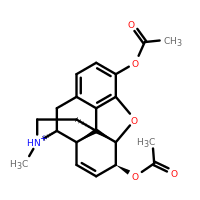

In [8]:
heroin

Heroin

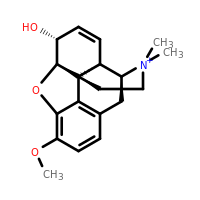

In [9]:
idx_most = similar_mols[0][0] 
molecules[idx_most]

The most similar molecule

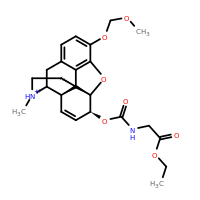

In [10]:
idx_least = similar_mols[-1][0] 
molecules[idx_least]

The least similar molecule

Similarity between these molecules:

In [11]:
usr_most = usr(molecules[idx_most])
usr_least = usr(molecules[idx_least])
usr_similarity(usr_most, usr_least)

0.13678393398437561